CSCI-GA.3033-​076 Vision Meets Machine Learning Assignment-2

In this assignment, you will train the Resnet18 classifier on the CIFAR-10 dataset and do the statistical analysis of the classification. 

Submission Info

You should make a copy of this Colab (File->Save a copy in Drive). Please start the assignment early and don’t be afraid to ask for help from either the TAs or myself. You are allowed to collaborate with other students in terms discussing ideas and possible solutions. However you code up the solution yourself, i.e. you must write your own code. Copying your friends code and just changing all the names of the variables is not allowed! You are not allowed to use solutions from similar assignments in courses from other institutions, or those found elsewhere on the web. Your solutions should be submitted via the NYU classes system.

# **Part 1- Training The Resnet classifier (40 Points)**

In [43]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
# Code here
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
# End here

In [49]:
# The CIFAR-10 dataset is available in the pytorch module.
#  http://www.cs.toronto.edu/~kriz/cifar.html
# Only normalization tranformation is applied. You can choose to apply data augmentation techniques as well.

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

#Loading the training data
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

#Loading the testing data
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')




Files already downloaded and verified
Files already downloaded and verified


In [6]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


**Question - 1. Show any 4 random images from the dataset.(10 Points)**

In [19]:
# Using the GPU available on the google colab
if torch.cuda.device_count() > 0:
    current_device = 'cuda'
else:
    current_device = 'cpu'
print('Current Device: ' + current_device)

Current Device: cuda


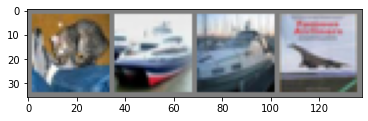

In [8]:
# Intiating the Resnet18 model from the torch module. Setting pretrained = False because we're training it from the scratch
net = models.resnet18(pretrained= False)
num_classes = 10

# VML Code starts here
dataiter = iter(testloader)
images, labels = dataiter.next()
 
imshow(torchvision.utils.make_grid(images))
# End


**Question-2. The Resnet18 model intialized here contains 1000 output classes change it to 10 classes in the model.(10 Points)**

In [9]:
#Model training
# start code here
num_ftrs = net.fc.in_features
net.fc = nn.Linear(num_ftrs, 10)
net = net.to(current_device)
# end code
criterion = nn.CrossEntropyLoss()
#You can expermient with different lr and momentum
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

num_epochs = 10
# It almost took forever to reach epoch 20, so I changed it to 10
# Since it does not show much difference after 10 in lr = 0.001
for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        
        inputs = inputs.to(current_device)
        labels = labels.to(current_device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')


[1,  2000] loss: 2.359
[1,  4000] loss: 2.092
[1,  6000] loss: 1.967
[1,  8000] loss: 1.852
[1, 10000] loss: 1.789
[1, 12000] loss: 1.717
[2,  2000] loss: 1.608
[2,  4000] loss: 1.561
[2,  6000] loss: 1.513
[2,  8000] loss: 1.508
[2, 10000] loss: 1.475
[2, 12000] loss: 1.388
[3,  2000] loss: 1.356
[3,  4000] loss: 1.328
[3,  6000] loss: 1.285
[3,  8000] loss: 1.238
[3, 10000] loss: 1.219
[3, 12000] loss: 1.216
[4,  2000] loss: 1.098
[4,  4000] loss: 1.131
[4,  6000] loss: 1.120
[4,  8000] loss: 1.098
[4, 10000] loss: 1.105
[4, 12000] loss: 1.073
[5,  2000] loss: 1.004
[5,  4000] loss: 0.986
[5,  6000] loss: 0.983
[5,  8000] loss: 0.974
[5, 10000] loss: 0.972
[5, 12000] loss: 0.949
[6,  2000] loss: 0.889
[6,  4000] loss: 0.898
[6,  6000] loss: 0.898
[6,  8000] loss: 0.896
[6, 10000] loss: 0.872
[6, 12000] loss: 0.889
[7,  2000] loss: 0.799
[7,  4000] loss: 0.824
[7,  6000] loss: 0.785
[7,  8000] loss: 0.773
[7, 10000] loss: 0.792
[7, 12000] loss: 0.841
[8,  2000] loss: 0.730
[8,  4000] 

**Question-3. (i).Plot the loss with epoch for lr = [10, 1, 0.1, 0.01, 0.001] and make comments about how high lr effects the training. (20 Points)**

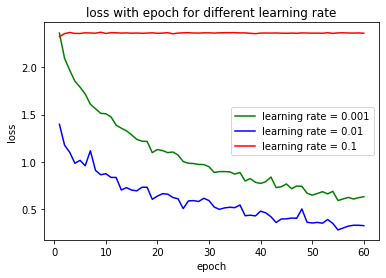

In [10]:
# Plot the loss 
a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
lr0001 = [2.359, 2.092, 1.967, 1.852, 1.789, 1.717, 1.608, 1.561, 1.513, 1.508, 1.475, 1.388, 1.356, 1.328, 1.285, 1.238, 1.219, 1.216, 1.098, 1.131, 1.12, 1.098, 1.105, 1.073, 1.004, 0.986, 0.983, 0.974, 0.972, 0.949, 0.889, 0.898, 0.898, 0.896, 0.872, 0.889, 0.799, 0.824, 0.785, 0.773, 0.792, 0.841, 0.73, 0.738, 0.768, 0.718, 0.746, 0.743, 0.67, 0.65, 0.667, 0.686, 0.663, 0.69, 0.593, 0.61, 0.626, 0.609, 0.623, 0.633]
lr001 = [1.397, 1.177, 1.101, 0.986, 1.017, 0.96, 1.118, 0.91, 0.865, 0.876, 0.837, 0.836, 0.704, 0.729, 0.703, 0.695, 0.733, 0.733, 0.606, 0.64, 0.665, 0.66, 0.625, 0.611, 0.508, 0.589, 0.592, 0.583, 0.617, 0.592, 0.525, 0.5, 0.515, 0.522, 0.518, 0.546, 0.433, 0.438, 0.431, 0.481, 0.463, 0.422, 0.361, 0.398, 0.4, 0.408, 0.406, 0.504, 0.364, 0.356, 0.362, 0.354, 0.393, 0.351, 0.283, 0.303, 0.323, 0.332, 0.332, 0.328]
lr01 = [2.321, 2.354, 2.365, 2.356, 2.355, 2.362, 2.36, 2.358, 2.368, 2.355, 2.364, 2.362, 2.359, 2.361, 2.358, 2.36, 2.357, 2.359, 2.362, 2.357, 2.359, 2.363, 2.352, 2.359, 2.362, 2.363, 2.36, 2.359, 2.362, 2.362, 2.359, 2.362, 2.363, 2.363, 2.364, 2.361, 2.361, 2.357, 2.353, 2.359, 2.36, 2.359, 2.36, 2.358, 2.357, 2.359, 2.357, 2.361, 2.36, 2.358, 2.359, 2.357, 2.363, 2.356, 2.361, 2.362, 2.36, 2.359, 2.361, 2.358]
plt.plot(a, lr0001, 'g-', label = 'learning rate = 0.001')
plt.plot(a, lr001, 'b-', label = 'learning rate = 0.01')
plt.plot(a, lr01, 'r-', label = 'learning rate = 0.1')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('loss with epoch for different learning rate')
plt.legend() 

plt.plot()
plt.show()

learning rate 1 and 10 is not available since they're way too big.

Comment: Learning rate is like your step to a pit while the bottom is the global optimum. If you choose the bigger step, your initial speed will be faster but you'll be swinging around and never reach optimum.

If you choose too small, it'll spend to much time in iteration.


In [65]:
#Testing the model
correct = 0
total = 0
# 
lb = []
prd = []
# 
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images.to(current_device))
        labels = labels.to(current_device)
        # # Start code here
        # print (labels)
        for i in range(0,4):
          lb.append(labels.cuda().data.cpu().numpy()[i])
        # End code
        # 1.出错的东西print出来
        _, predicted = torch.max(outputs.data, 1)
        # Start code
        for k in range(0,4):
          prd.append(predicted.cuda().data.cpu().numpy()[k])
        # End code
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        # correct is prediction totoal is ground truth

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 71 %


## **Part - 2 (20 Points)**

Question-1. Calculate the confusion matrix of the classifcation. (10 Points)

In [67]:
# # Code starts here
y_test = lb
y_pred = prd
# # (Why not available) 
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[773  23  35  12  16   3  11   9 101  17]
 [ 21 831   7   4   8   1  15   5  30  78]
 [ 79   5 639  40  79  48  55  33  16   6]
 [ 44  11  96 412  80 134 123  53  29  18]
 [ 24   4  94  29 693  20  43  77  13   3]
 [ 23   5  84 118  58 532  59  91  19  11]
 [ 15   4  47  42  36  17 812  12  11   4]
 [ 24   1  47  22  58  32  19 785   3   9]
 [ 46  25  17   7   5   3  11   3 875   8]
 [ 53  87  11   5   7   5  13  17  54 748]]


Question-2. Calculate the Precision, Recall and F1-score for each class. (10 Points)

(Hint - You can find this article useful - https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826) 

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2', 'Class 3','Class 4', 'Class 5','Class 6', 'Class 7', 'Class 8', 'Class 9', 'Class 10']))


Accuracy: 0.71

Micro Precision: 0.71
Micro Recall: 0.71
Micro F1-score: 0.71

Macro Precision: 0.71
Macro Recall: 0.71
Macro F1-score: 0.70

Weighted Precision: 0.71
Weighted Recall: 0.71
Weighted F1-score: 0.70

Classification Report

              precision    recall  f1-score   support

     Class 1       0.70      0.77      0.74      1000
     Class 2       0.83      0.83      0.83      1000
     Class 3       0.59      0.64      0.62      1000
     Class 4       0.60      0.41      0.49      1000
     Class 5       0.67      0.69      0.68      1000
     Class 6       0.67      0.53      0.59      1000
     Class 7       0.70      0.81      0.75      1000
     Class 8       0.72      0.79      0.75      1000
     Class 9       0.76      0.88      0.81      1000
    Class 10       0.83      0.75      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.70     10000
weighted avg       0.71      0.71      0.70     10000

